In [1]:
#Importing needed packages and modules
import pandas as pd
import numpy as np

In [2]:
#Importing the file for further analysis
df = pd.read_csv("GBvideos.csv")

In [3]:
#Playing around and trying to find a use-case
# --> How popular is Trump? Is he getting more likes or dislikes on videos about him?
trump = df[df["title"].str.contains("Trump") & ~df["tags"].str.contains("Satire")]
print(trump["likes"].sum(axis=0)," likes and ",trump["dislikes"].sum(axis=0)," dislikes")

7772651  likes and  940688  dislikes


In [5]:
#Printing out the data types to see which ones have to be transformed at a later point
df.head()
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [6]:
#Creating a correlation matrix to see which of the features are correlated with one another
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1,-0.171061,-0.18216,-0.0210252,-0.0586288,0.0327013,-0.0563841,-0.00702199
views,-0.171061,1,0.795862,0.392407,0.466899,-0.00612428,0.0134863,0.00981013
likes,-0.18216,0.795862,1,0.446746,0.744361,-0.041698,-0.0322463,0.00846373
dislikes,-0.0210252,0.392407,0.446746,1,0.771772,-0.00893495,-0.0125336,0.0114622
comment_count,-0.0586288,0.466899,0.744361,0.771772,1,-0.0345265,-0.021059,0.00367443
comments_disabled,0.0327013,-0.00612428,-0.041698,-0.00893495,-0.0345265,1,0.514951,-0.00563296
ratings_disabled,-0.0563841,0.0134863,-0.0322463,-0.0125336,-0.021059,0.514951,1,-0.00353581
video_error_or_removed,-0.00702199,0.00981013,0.00846373,0.0114622,0.00367443,-0.00563296,-0.00353581,1


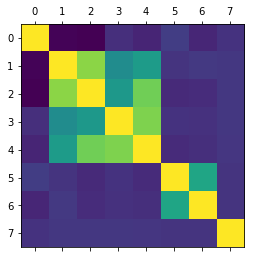

In [7]:
#Basically the same as above but with a focus on color rather than numbers
plt.matshow(df.corr())
plt.show()

In [8]:
#Printing out the head to get a feeling for the data which has to be analyzed
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [10]:
#Finding out whether the dataset is normally distributed and the amount of data is consistent
#np.max(df["publish_time"].str[:6])
import collections
collections.Counter(df["trending_date"].str[:8])

Counter({'17.14.11': 200,
         '17.15.11': 199,
         '17.16.11': 199,
         '17.17.11': 200,
         '17.18.11': 200,
         '17.19.11': 200,
         '17.20.11': 200,
         '17.21.11': 200,
         '17.22.11': 200,
         '17.23.11': 200,
         '17.24.11': 200,
         '17.25.11': 200,
         '17.26.11': 200,
         '17.27.11': 200,
         '17.28.11': 200,
         '17.29.11': 200,
         '17.30.11': 200,
         '17.01.12': 198,
         '17.02.12': 199,
         '17.03.12': 199,
         '17.04.12': 200,
         '17.05.12': 200,
         '17.06.12': 199,
         '17.07.12': 200,
         '17.08.12': 200,
         '17.09.12': 200,
         '17.10.12': 200,
         '17.11.12': 200,
         '17.12.12': 200,
         '17.13.12': 200,
         '17.14.12': 200,
         '17.15.12': 200,
         '17.16.12': 200,
         '17.17.12': 200,
         '17.18.12': 200,
         '17.19.12': 200,
         '17.20.12': 200,
         '17.21.12': 200,
         '17

In [12]:
#Checking if the information above about the data is actually correct
df[df['publish_time'].str.contains('2017-03')]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
3287,6m0lnvcQPP0,17.30.11,I Am Iron Man: Iron Man 3 Ending Scene,Travis Peterson,22,2017-03-29T05:47:04.000Z,"Iron Man|""Marvel""",95555,446,10,38,https://i.ytimg.com/vi/6m0lnvcQPP0/default.jpg,False,False,False,The ending scene to Iron Man 3. All rights go ...


In [13]:
#Saving the original DataFrame if we need to return to it
orig_df = df.copy()

In [14]:
#Cleanin the columns Tags and Title from junk so we have it easier to work with the Strings at a later point
df["clean_tags"]=df["tags"].str.translate({ord(i): " " for i in '|\"\\\/'})
df["title"]=df["title"].str.translate({ord(i): "" for i in '#\(\)*-\{\}\[\]|\'\:'})

In [16]:
#An overview of the IDs from the YouTube API and their corresponding subject
categories = {2:  "Autos & Vehicles",
1 :"Film & Animation",
10:"Music",
15:"Pets & Animals",
17:"Sports",
18:"Short Movies",
19:"Travel & Events",
20:"Gaming",
21:"Videoblogging",
22:"People & Blogs",
23:"Comedy",
24:"Entertainment",
25:"News & Politics",
26:"Howto & Style",
27:"Education",
28:"Science & Technology",
29:"Nonprofits & Activism",
30:"Movies",
31:"Anime/Animation",
32:"Action/Adventure",
33:"Classics",
34:"Comedy",
35:"Documentary",
36:"Drama",
37:"Family",
38:"Foreign",
39:"Horror",
40:"Sci-Fi/Fantasy",
41:"Thriller",
42:"Shorts",
43:"Shows",
44:"Trailers"}
#Src: https://gist.github.com/dgp/1b24bf2961521bd75d6c

In [17]:
#Creating a new column which contains the subjects as a String
df["category_type"]=df["category_id"].copy()
df["category_type"].replace(categories, inplace=True)

In [18]:
#Changing the Trending Date Column from Object into a Date
df['trending_date']=pd.to_datetime(df['trending_date'],format="%y.%d.%m")

In [19]:
#Changing the Publish Time Date Column from Object into Date
#pt = df['publish_time'].str.translate({ord(i): " " for i in 'TZ'})
df['publish_time'] = pd.to_datetime(df['publish_time'])#,format="%y-%m-%d %H:%M:%S")
#print(datetime.strptime(pt[0],"%D.%M.%Y"))
#print(datetime.strptime(str(pt[0]), "%Y.%m.%d"))
#df['publish_time']=pd.to_datetime(pt,format="%y-%m-%d %H:%M:%S")

In [21]:
#Creating new columns for the Trending Weekday and Publish Weekday
import datetime
weekdays = {0:"Monday",
           1: "Tuesday",
           2:"Wednesday",
           3:"Thursday",
           4: "Friday",
           5:"Saturday",
           6: "Sunday"}
df["trending_weekday"] = df["trending_date"].apply(lambda x : datetime.datetime(int(str(x)[:4]),int(str(x)[5:7]),int(str(x)[8:10])).weekday())
df["trending_weekday"].replace(weekdays, inplace=True) 
df["publish_weekday"] = df["publish_time"].apply(lambda x : datetime.datetime(int(str(x)[:4]),int(str(x)[5:7]),int(str(x)[8:10])).weekday())
df["publish_weekday"].replace(weekdays, inplace=True) 

In [49]:
#Rearranging the columns
df = df[[ 'trending_date','trending_weekday', 'title', 'channel_title','category_type',
       'publish_time','publish_weekday', 'clean_tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled',
       'video_error_or_removed']]

In [50]:
#Checking if everything has the correct datatype now
df.dtypes

trending_date                  datetime64[ns]
trending_weekday                       object
title                                  object
channel_title                          object
category_type                          object
publish_time              datetime64[ns, UTC]
publish_weekday                        object
clean_tags                             object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
dtype: object

In [51]:
#Creating an overview of the video consumption based on each day in the week
weekday_overview = df['trending_weekday'].value_counts().sort_values(ascending=False)
weekday_table = pd.concat([weekday_overview.to_frame(),np.round(weekday_overview/weekday_overview.sum()*100,3)],axis=1)
weekday_table.columns = ['weekday consumption absolute','weekday consumption in %']

In [52]:
#Displaying above
weekday_table

,weekday consumption absolute,weekday consumption in %
Saturday,5739,14.747
Tuesday,5674,14.580
Wednesday,5532,14.215
Friday,5528,14.205
Thursday,5489,14.105
Sunday,5483,14.089
Monday,5471,14.058


In [53]:
#Creating an overview of the most popular categories of the trending videos and displaying them
category_overview = df['category_type'].value_counts().sort_values(ascending=False).to_frame(name="Count")
category_overview

,Count
Music,13754
Entertainment,9124
People & Blogs,2926
Film & Animation,2577
Howto & Style,1928
Sports,1907
Comedy,1828
Gaming,1788
News & Politics,1225
Pets & Animals,534


In [54]:
#Importing nltk for natural language processing
from nltk import *

In [55]:
#Doing a frequency analysis on the title
freqDist = FreqDist(df['title'])

In [56]:
#Checking which are the most common titles
freqDist.most_common()

[('Maroon 5  Wait', 40),
 ('To Our Daughter', 38),
 ('Jurassic World Fallen Kingdom  Official Trailer 2 HD', 38),
 ('Justin Timberlake’s FULL Pepsi Super Bowl LII Halftime Show!  NFL Highlights',
  38),
 ('AnneMarie  2002 Official Video', 38),
 ('VENOM  Official Teaser Trailer HD', 37),
 ('Whethan, Dua Lipa  High Audio', 37),
 ('Incredibles 2  Olympics Sneak Peek', 37),
 ('Fergie Performs The U.S. National Anthem / 2018 NBA AllStar Game', 37),
 ('Rich Brian  Cold Official Music Video', 37),
 ('Janelle Monáe – Make Me Feel Official Music Video', 37),
 ('BHAD BHABIE feat. Lil Yachty  Gucci Flip Flops Official Music Video  Danielle Bregoli',
  37),
 ('Florence + The Machine  Hunger', 37),
 ('Royce da 59  Caterpillar ft. Eminem, King Green', 37),
 ('Sam Smith  Pray Official Video ft. Logic', 37),
 ('Enrique Iglesias  MOVE TO MIAMI Official Video ft. Pitbull', 37),
 ('Falcon Heavy Test Flight', 36),
 ('Deadpool, Meet Cable', 36),
 ('Kendrick Lamar, SZA  All The Stars', 36),
 ('Pawn Stars Da

In [57]:
#Checking if above answer is correct
df[df['title'].str.contains("Maroon 5  Wait")].shape[0]

40

In [58]:
df

,trending_date,trending_weekday,title,channel_title,category_type,publish_time,publish_weekday,clean_tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2017-11-14,Tuesday,John Lewis Christmas Ad 2017 MozTheMonster,John Lewis,Howto & Style,2017-11-10 07:38:29+00:00,Friday,christmas john lewis christmas john lewis ...,7224515,55681,10247,9479,False,False,False
1,2017-11-14,Tuesday,Taylor Swift …Ready for It? Live SNL,Saturday Night Live,Entertainment,2017-11-12 06:24:44+00:00,Sunday,SNL Saturday Night Live SNL Season 43 Epi...,1053632,25561,2294,2757,False,False,False
2,2017-11-14,Tuesday,Eminem Walk On Water Audio ft. Beyoncé,EminemVEVO,Music,2017-11-10 17:00:03+00:00,Friday,Eminem Walk On Water Aftermath Shady In...,17158579,787420,43420,125882,False,False,False
3,2017-11-14,Tuesday,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,Sports,2017-11-13 02:30:38+00:00,Monday,Salford City FC Salford City Salford Clas...,27833,193,12,37,False,False,False
4,2017-11-14,Tuesday,Dashcam captures trucks near miss with child i...,Cute Girl Videos,News & Politics,2017-11-13 01:45:13+00:00,Monday,[none],9815,30,2,30,False,False,False
5,2017-11-14,Tuesday,How My Relationship Started!,PointlessBlogVlogs,Entertainment,2017-11-11 17:00:00+00:00,Saturday,pointlessblog pointlessblogtv pointlessblog...,1182775,52708,1431,2333,False,False,False
6,2017-11-14,Tuesday,Ed Sheeran Perfect Official Music Video,Ed Sheeran,Music,2017-11-09 11:04:14+00:00,Thursday,edsheeran ed sheeran acoustic live cove...,33523622,1634124,21082,85067,False,False,False
7,2017-11-14,Tuesday,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,People & Blogs,2017-11-10 19:19:43+00:00,Friday,zoe sugg zoella zoe vlog vlogging vlo...,1164201,57309,749,624,False,False,False
8,2017-11-14,Tuesday,Elbow Golden Slumbers John Lewis Advert 2017,ElbowVEVO,Music,2017-11-10 08:00:01+00:00,Friday,Elbow Golden Slumbers Polydor Alternative,154494,2163,147,211,False,False,False
9,2017-11-14,Tuesday,"Jennifer Lopez Amor, Amor, Amor Official Vide...",JenniferLopezVEVO,Music,2017-11-10 15:00:00+00:00,Friday,Jennifer Lopez ft. Wisin Jennifer Lopez ft. W...,9548677,190084,15015,11473,False,False,False
